# Case Assignment
Author: P. Verboven
Date: 14-02-2022
Datasets courtesy of ARS T&TT
Tools: Jupyter notebook with Python 3 kernel

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from itertools import product

## Assignment 1: Traffic Flow Continuity and Daily Patterns

In [2]:
df_da1 = pd.read_csv("../data/data_assignment_1.csv")

In [3]:
df_da1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   LocationIdentifier  2880 non-null   object
 1   Date                2880 non-null   object
 2   Hour                2880 non-null   int64 
 3   Quarter             2880 non-null   int64 
 4   vehicleCount        2880 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 112.6+ KB


Dataset for this assignment seems to be clean: no missing data.

In [4]:
df_da1.Date = pd.to_datetime(df_da1.Date, infer_datetime_format=True)
# df_da1.Date = pd.to_datetime(df_da1.Date, format='%m-%d-%Y')
df_da1.sample(3)

,LocationIdentifier,Date,Hour,Quarter,vehicleCount
1170,GEO01_279BERL_D2,2021-11-24,4,30,40
984,GEO01_279BERL_D2,2021-11-22,6,0,257
2738,GEO01_279MIDD_D2,2021-11-25,12,30,242


In [5]:
ser_day_of_week= pd.DatetimeIndex(df_da1['Date']).day_name().str[:3]

In [6]:
df_da1.insert(df_da1.columns.get_loc('vehicleCount'), 'Day', ser_day_of_week)
df_da1["Date"] +=  pd.to_timedelta(df_da1.Hour, unit='h') + pd.to_timedelta(df_da1.Quarter, unit="m")
df_da1 = df_da1.drop(["Hour", "Quarter"], axis=1)
df_da1 = df_da1.set_index('Date')

In [7]:
df_da1.head(3)

,LocationIdentifier,Day,vehicleCount
Date,,,
2021-11-22 00:00:00,GE001_279DUNG_D1,Mon,23
2021-11-22 00:15:00,GE001_279DUNG_D1,Mon,13
2021-11-22 00:30:00,GE001_279DUNG_D1,Mon,8


The dataset contains six identifiers for three locations

In [8]:
df_da1.LocationIdentifier.unique()

array(['GE001_279DUNG_D1', 'GE001_279DUNG_D2', 'GEO01_279BERL_D2',
       'GEO01_279BERL_D1', 'GEO01_279MIDD_D1', 'GEO01_279MIDD_D2'],
      dtype=object)

### Q1: Which of the three locations appears to have its two directions swapped?<br>How can you conclude this?

To answer this question, we will look at the collected log data for each location and render two plots of resp. the D1 and D2 direction.

In [9]:
def plot_locations(start: str, end: str, df):
    sensors = df["LocationIdentifier"].unique().tolist()
    sensors.sort()
    sns.set(rc={"figure.figsize":(18, 20)})
    fig, axes = plt.subplots(nrows=3, ncols=2)
    grid_points = np.array(list(product(range(3),range(2))))
    for i, sensor in enumerate(sensors):
        df.query('LocationIdentifier == @sensor and Date >=  @day_start and Date < @day_end')\
            .plot(ax=axes[grid_points[i][0],grid_points[i][1]], title=sensor)
    return None

We randomly pick a day of collected data, i.e. 24 hours, f.e. the 25th of November 2021.

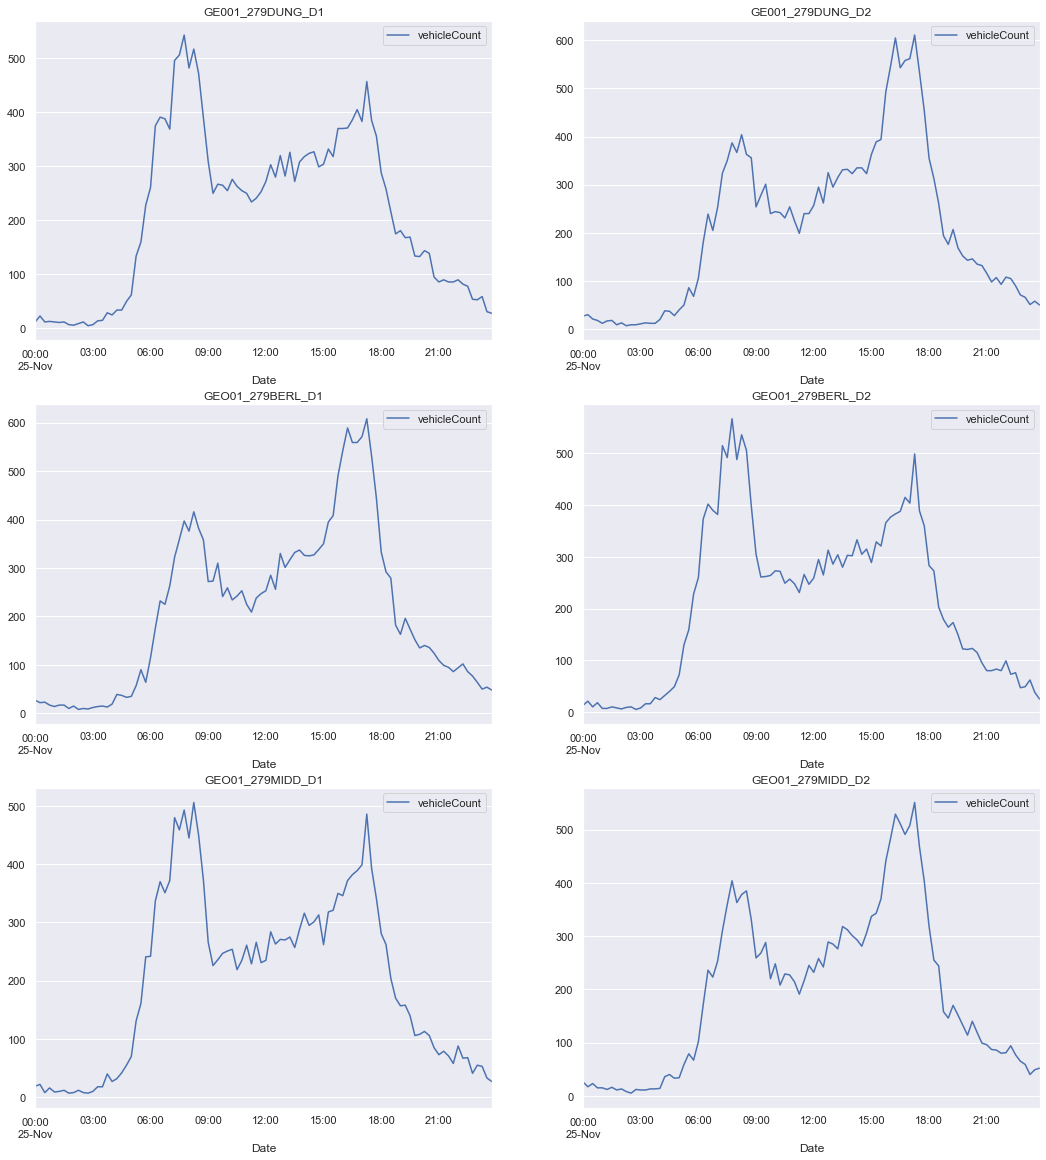

In [10]:
day_start = "2021-11-25"
day_end = "2021-11-26"
plot_locations(day_start, day_end, df_da1)

The plots for location GE001_279DUNG and GEO01_279MIDD_D2 show quite simular charts for resp the D1 and D2 directional measurements.
Location GEO01_279BERL seems to show the opposite of the other two locations.

We will pick another day, to be sure it is not a coincidence

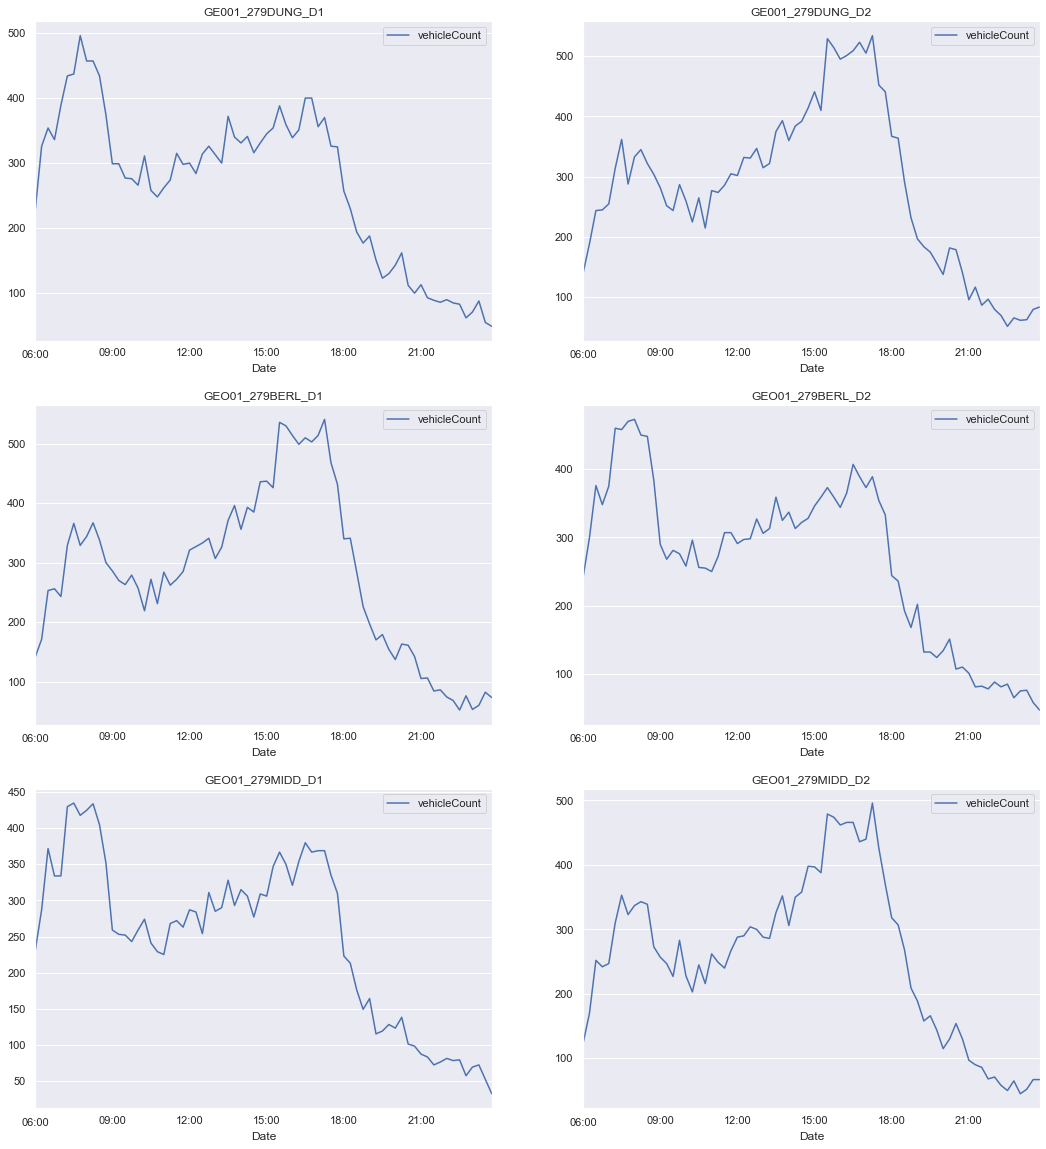

In [11]:
day_start = "2021-11-26 06:00"
day_end = "2021-11-27 19:00"
plot_locations(day_start, day_end, df_da1)

These plots reveal a simular pattern, so it seems likely location GEO01_279BERL has its directions swapped.
Since traffic from GE001_279DUNG to GEO01_279MIDD_D2 and vice versa, has to pass location GEO01_279BERL, it is very unlikely that GEO01_279BERL is correctly recording the opposite pattern.<br>Vehicles cannot disappear or show up out of the blue at location GEO01_279BERL.
Therefore we may conclude that location GEO01_279BERL has its directions swapped.


### Q2: Which direction do you think the direction 1 is measuring (either towards Den Bosch, or away from Den Bosch)?<br>Why?
If we agree that GEO01_279BERL has its directions swapped, the D1 plots for all three locations show increased traffic in the morning hours, roughly between 06:20 and 09:00 hrs CET as well as between 15:30 and 18:00 CET in the afternoon in the opposite direction at D2, so the seems mostly commuting. Since the measuring locations are near the city of Den Bosch, it is common sense to believe the traffic is inbound, towards the city in the morning and outbound in the afternoon, if we assume that Den Bosch is economically essential and no other cities are in the vicinity of the measuring locations. Therefore, D1 seems to be inbound, towards Den Bosch.


### Q3 Based on your above reasoning, which way does the direction GEO01_625EMPE_D1 point to?
GEO01_625EMPE_D1 is showing a simular pattern as the other locations
The plot shows less traffic intensity on Saturday, i.e. 27-11-2021 , compared to weekdays and the graph is more flattened.
This adds to our confidence that the traffic peaks during weekdays are commuters. Inbound and outbound traffic on Saturdays can be explained by people with the intention to go shopping and for leisure in the city of Den Bosch.
Based on our conclusion from Q2, the reddish graph is showing peak traffic in the morning hours during weekdays, so it is likely inbound traffic towards Den Bosch. According to the legend of the plot, it is GEO01_625EMPE_D2.
Therefore, GEO01_625EMPE_D1 must be outbound traffic, away from Den Bosch. Even more because it is not a freeway, preferable used by commuters from Den Bosch to f.e. Utrecht, I assume.

## Assignment 2: Traffic Analysis

In [12]:
df_da2 = pd.read_csv("../data/data_assignment_2_v3.csv")

Dataset for this assignment seems to be clean: no missing data.

In [13]:
df_da2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29068 entries, 0 to 29067
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ldsId          29068 non-null  int64
 1   passageTime    29068 non-null  int64
 2   passagetimeMs  29068 non-null  int64
 3   loopPairId     29068 non-null  int64
 4   startLoop      29068 non-null  int64
 5   endLoop        29068 non-null  int64
 6   vehicleLength  29068 non-null  int64
 7   vehicleSpeed   29068 non-null  int64
dtypes: int64(8)
memory usage: 1.8 MB


In [14]:
# type(df_da2.passageTime[0])

In [15]:
df_da2.sample(3)

,ldsId,passageTime,passagetimeMs,loopPairId,startLoop,endLoop,vehicleLength,vehicleSpeed
28523,1537,1643144157,744,2,3,4,388,118
13960,1537,1643112750,946,2,3,4,339,97
8760,1537,1643100919,74,2,3,4,360,113


Dataset contains data from one location of three detectors with a 24 hours timespan for 25-01-2022

In [16]:
df_da2["ldsId"].nunique()

1

In [17]:
df_da2["loopPairId"].nunique()

3

Some data preprocessing has been done to make it easier for quantitative and visual exploration.

In [18]:
df_da2 = df_da2.drop(["ldsId","startLoop", "endLoop"], axis = 1 )
df_da2.passageTime = pd.to_datetime(df_da2.passageTime, unit = 's')
df_da2['passageTime'] = df_da2['passageTime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')
df_da2 = df_da2.set_index('passageTime')

In [19]:
df_da2.head(3)

,passagetimeMs,loopPairId,vehicleLength,vehicleSpeed
passageTime,,,,
2022-01-25 00:00:29+01:00,743,3,408,127
2022-01-25 00:00:38+01:00,770,2,358,107
2022-01-25 00:00:41+01:00,861,3,368,93


From the three loop detectors installed, one detector has roughly logged as many vehicles, as the other two combined

In [20]:
df_da2["loopPairId"].value_counts().sort_values(ascending=False)

2    15395
3     6994
1     6679
Name: loopPairId, dtype: int64

### Q1: What LoopPairId refers are likely to refer to which lanes? Why?

In [21]:
df_da2.groupby("loopPairId")["vehicleSpeed"].agg(["min", "max", "mean","median"]).transpose()

loopPairId,1,2,3
min,70.000000,0.000000,19.000000
max,211.000000,201.000000,199.000000
mean,114.085642,102.190971,97.085931
median,112.000000,101.000000,96.000000


Looking at several speed statistics, it is likely that loopPairId 1 relates to Lane 1, since the minimum speed over 24 hours is 70 Km/h.
Lane 1 is a takeover lane and vehicles in lane 2 who intent to take over traffic in front of them, will have to increase speed (temporarily), in order to get into lane 1. This also explains the higher average speed in lane 1 over lane 2 and lane 3.
As mentioned above, loopPairId 2 has recorded the most vehicles over the 24 hour timespan and since Lane B is the rightmost lane, in which drivers are required to drive or even with heavy vehicles , must stay in. it is likely that loopPairId 2 refers to Lane B.
Even more because Lane C is heading towards a destination, i.e. a petrol station, so you expect at least some drivers anticipating already near loopPairId 3. to reduce speed, to be able to make a full stop at the petrol station. Since loopPairId 3 is showing the lowest average speed compared to loopPairId 1 and loopPairId 2, loopPairId 3 must refer to Lane C.

P.S.
Most interesting is the recorded zero speed by loopPairId 2
Having a closer look at it, reveals that it has been a single detection of a passenger car in afternoon hours.
From data investigated for Q2, it is not likely related to traffic jams. So, I cannot explain this incident.

In [22]:
# check  O speed  loopPairID 2 !
# no traffic jam
zero_speed = ( df_da2["vehicleSpeed"] == 0 ) & (df_da2["loopPairId"] == 2)
df_da2[zero_speed]

,passagetimeMs,loopPairId,vehicleLength,vehicleSpeed
passageTime,,,,
2022-01-25 15:29:00+01:00,121,2,450,0


### Q2: What do you think is the speed limit on the highway where the location is?<br>Does this change during the day?
Assumptions taken from Q1:
loopPairId 1 refers to Lane A
loopPairId 2 refers to Lane B
loopPairId 3 refers to Lane C

Based on the average speed and number of observations per detector and the difference between day and nighttime as stated below and some speed plot of cars from Q3, I would infer that the maximum speed for this road is 100 Km/h during daytime and 120 Km/h during nighttime:
loopPairId 2 with most vehicles registered, has a mean of slightly over 100 Km/h during day time and slightly over 111 Km/h during day time.
loopPairId 1 registered a mean of 113 Km/h during daytime, which you expect for a takeover lane, where drivers increase speed beyond the limit to take over.  The 124 Km/h mean of loopPairId 1 during nighttime could be explained by the reduced numbers of vehicles on the road, so drivers feel free to drive close to or beyond the speed limit.

In [23]:
df_da2.loc['2022-01-25 06:00':'2022-01-25 19:00'].groupby("loopPairId")["vehicleSpeed"].agg(["min", "max", "mean","median"]).transpose()

loopPairId,1,2,3
min,70.00000,0.000000,19.000000
max,211.00000,180.000000,199.000000
mean,113.22145,100.679201,96.410858
median,111.00000,101.000000,96.000000


In [24]:
df_da2.loc['2022-01-25 06:00':'2022-01-25 19:00'].groupby("loopPairId").size().transpose()


loopPairId
1     6191
2    13164
3     5968
dtype: int64

In [25]:
df_da2.loc['2022-01-25 19:00':'2022-01-26 00:00'].groupby("loopPairId")["vehicleSpeed"].agg(["min", "max", "mean","median"]).transpose()

loopPairId,1,2,3
min,94.000000,79.000000,62.000000
max,200.000000,165.000000,161.000000
mean,125.339474,111.437232,101.498567
median,124.000000,110.000000,101.000000


In [26]:
df_da2.loc['2022-01-25 19:00':'2022-01-26 00:00'].groupby("loopPairId").size().transpose()

loopPairId
1     380
2    1633
3     698
dtype: int64

### Q3: How is the traffic distributed into the length categories?<br>Does this split change during the day?<br>Does this distribution change between the lanes? Why?<br>What can you say about the distribution of traffic on lanes B and C?

In [27]:
df_da2["category"] = pd.cut(x=df_da2["vehicleLength"], bins= [0, 240, 560, 1150, 1220, 2500],labels = ["Cat.1", "Cat.2", "Cat.3", "Cat.4", "Cat.5"])

The tabel and plot below shows the distribution of traffic per category.
The majority of vehicles are passenger cars and cargo transport, such as trucks

In [28]:
df_da2.category.value_counts().sort_values(ascending=False)

Cat.2    25606
Cat.3     1898
Cat.5      807
Cat.1      702
Cat.4       54
Name: category, dtype: int64

In [29]:
df_da2.groupby("category").size().transpose()

category
Cat.1      702
Cat.2    25606
Cat.3     1898
Cat.4       54
Cat.5      807
dtype: int64

<AxesSubplot:title={'center':'Distribution of vehicle categories'}, xlabel='category'>

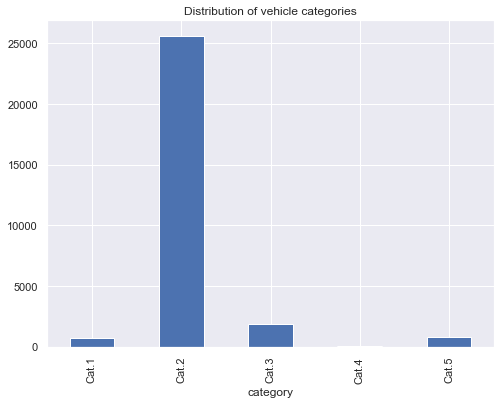

In [30]:
sns.set(rc={"figure.figsize":(8, 6)})
df_da2.pivot_table(columns='category',aggfunc='size').plot(kind='bar', title="Distribution of vehicle categories")

In [31]:
hourly_cat2 = df_da2[df_da2["category"] == "Cat.2"].resample('H').mean()
hourly_other = df_da2[df_da2["category"]  != "Cat.2"].resample('H').mean()

The plot below of the average recordings per hour for all lanes, shows the traffic separated into two categories:
the passenger cars and a category with all other traffic, of which are mostly cargo transport, such as light trucks.
Both categories in this graph show simular patterns, with lower traffic during a great part of the day.
We need more information and will create bar charts to avoid interpolation


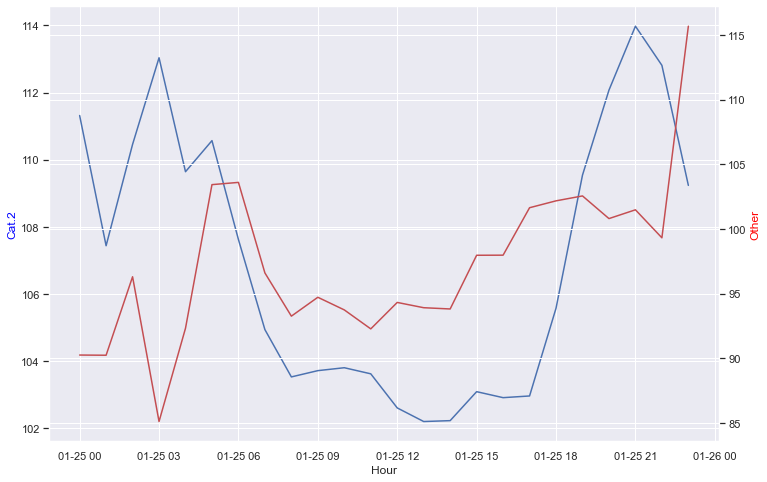

In [41]:
sns.set(rc={"figure.figsize":(12, 8)})
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(hourly_cat2.index, hourly_cat2['vehicleSpeed'], 'b-')
ax2.plot(hourly_other.index, hourly_other['vehicleSpeed'], 'r-')

ax1.set_xlabel('Hour')
ax1.set_ylabel('Cat.2', color='blue')
ax2.set_ylabel('Other', color='red')

plt.show()


In [33]:
# df_da2.index.strftime("%H:%m:%S")
sns.set(rc={"figure.figsize":(18, 10)})

The first bar chart below shows vehicles per category, over all lanes totally and  counted per 2 hours.<br>The distribution seems to not change much during the day.
Cat.2 and Cat.3 are most prominent. Cat.4 and to a lesser extent Cat.1, seem to drive mostly in the middle of the day.

<AxesSubplot:title={'center':'vehicle count per category'}, ylabel='passageTime'>

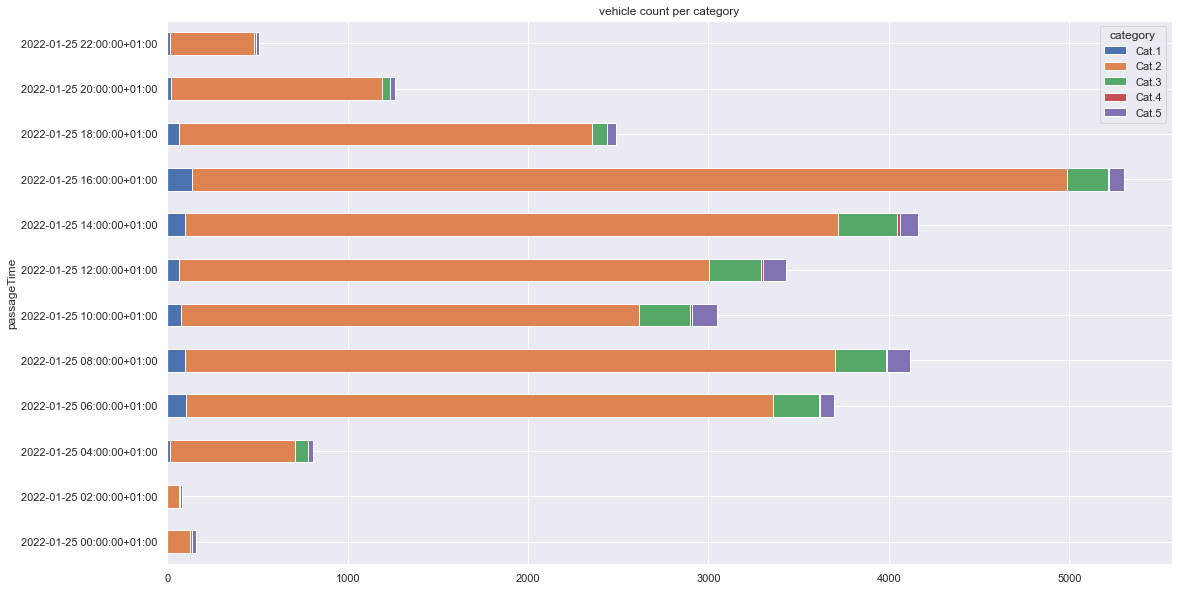

In [34]:
df_da2.groupby(["category"])["vehicleLength"].resample('2H').count().unstack().transpose().plot.barh(stacked = True, title="vehicle count per category")

In [35]:
df_categories_perLD = df_da2.groupby(["loopPairId", "category"])["vehicleLength"].resample('2H').count()

Looking at the distribution of categories over time per lane as in de bar charts below, it is obvious that Lane A is for overtake only;
you will rarely find heavy trucks of Cat.5 on Lane A. This lane has very low traffic in the early morning hours, which is explained by low traffic during those hours any way, so most drivers can stay on Lane B, without the need to overtake.
In regard to the distribution of traffic on Lane B and Lane C, distribution patterns are very simular, whilst drivers of Cat.1 seem to less feel the need to make a pitstop and refill their tank.
Still, it is remarkable that the traffic intensity for both Lane B and Lane C is almost identical, knowing Lane C to be a destination, ending in a full stop!

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


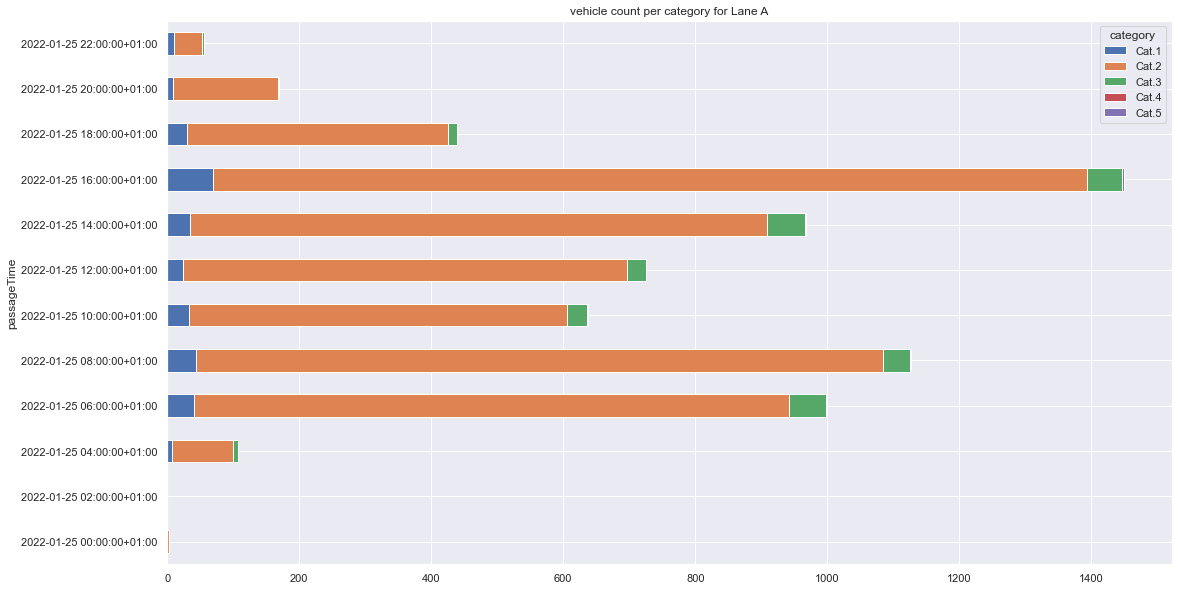

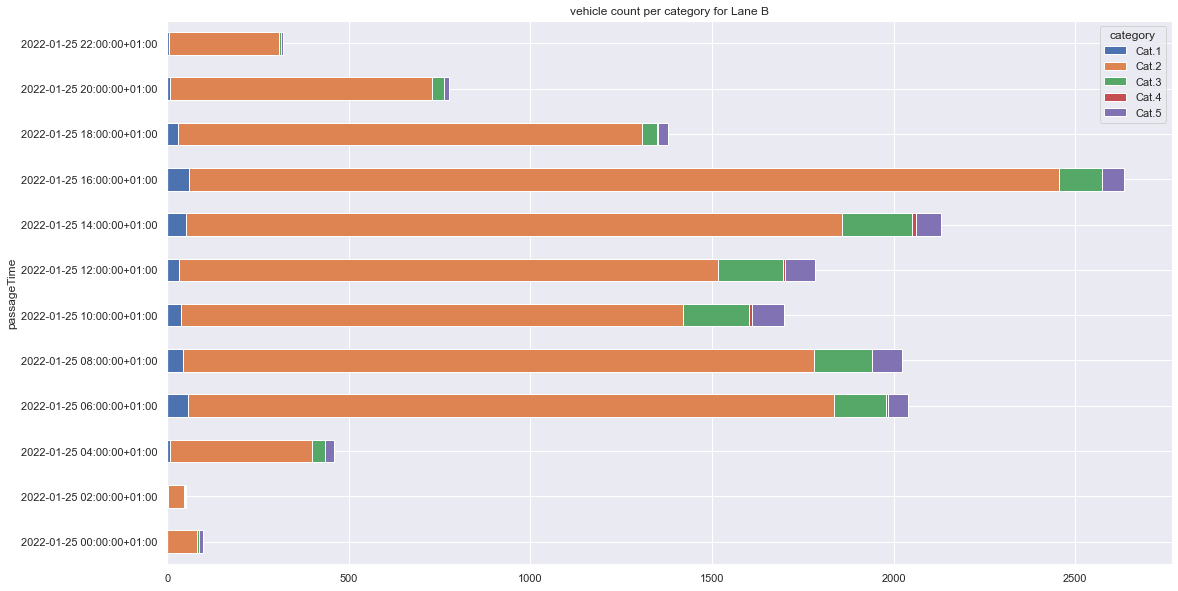

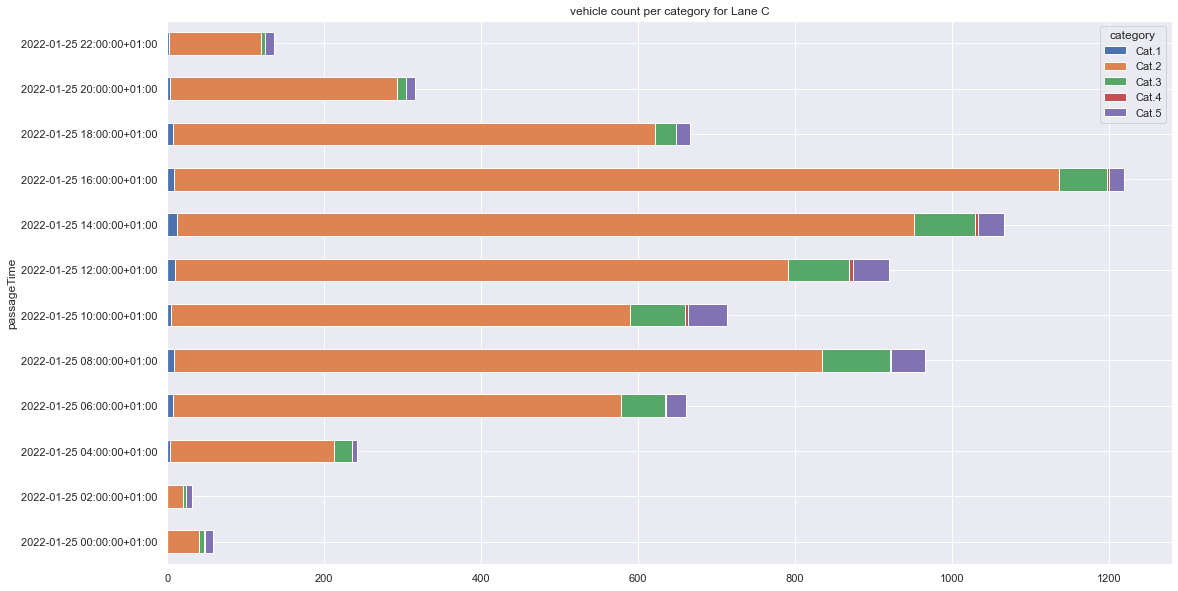

In [36]:
lanes = ("A", "B", "C")
for ld, lane in enumerate(lanes, 1):
    print(df_categories_perLD.loc[ld].unstack().transpose().plot.barh(stacked = True, title=f"vehicle count per category for Lane {lane}"))

## Q4
Although considering this the most challenging question, it was my choice to select the Jupyter notebook for this assignment, using dataframes for which operations upon are array based. To answer this question , I believe, I have to make calculations on selective individual data entries, which requires me to think out of the box when using a Jupyter notebook environment and for which I need more time to think about.
It might have been  easier to work with a spreadsheet application for this question, with individual cells and conditional lookups, but it was not my choice. Because of my interest in anomaly detection, it frustrates me not being able to create some kind of rule based error detection process, with the criteria given in this assignment and solving this problem within the given timeframe.

Within this notebook, my approach to this question was, to create a new dataframe with identical recorded Unix epoch detection timestamps for loop pairs 1 and 2, such that the difference between two detections would be in milliseconds, calculating the difference between passagetimeMs of loopPairId 1 and loopPairId 2.

Then I realised I did not set an integrity check on the passageTime column when creating the index for this dataframe !
I got stuck and gave in for the moment ....

In [37]:
df_da2[df_da2.passageTime.duplicated(keep=False)].shape[0]

AttributeError: 'DataFrame' object has no attribute 'passageTime'